In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Beijing.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [3]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,377890.000000,379973.000000,377618.000000,374611.000000,366779.000000,374146.00000,385326.000000,385331.000000,385321.000000,385334.000000,385400.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.524195,104.109286,15.691192,49.850991,1227.845992,57.46308,13.534826,1010.646948,2.433321,0.064208,1.731640
std,10122.118037,1.177198,3.448708,8.800103,6.922196,80.697383,91.438187,21.536067,34.834960,1154.419986,56.54762,11.439508,10.474684,13.801933,0.812422,1.250146
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.21420,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,2.000000,23.000000,500.000000,11.00000,3.100000,1002.200000,-9.000000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,42.000000,900.000000,45.00000,14.500000,1010.300000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,19.000000,70.000000,1500.000000,82.00000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,276.000000,10000.000000,1071.00000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385704 entries, 0 to 385703
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       385704 non-null  int64  
 1   year     385704 non-null  int64  
 2   month    385704 non-null  int64  
 3   day      385704 non-null  int64  
 4   hour     385704 non-null  int64  
 5   PM2.5    377890 non-null  float64
 6   PM10     379973 non-null  float64
 7   SO2      377618 non-null  float64
 8   NO2      374611 non-null  float64
 9   CO       366779 non-null  float64
 10  O3       374146 non-null  float64
 11  TEMP     385326 non-null  float64
 12  PRES     385331 non-null  float64
 13  DEWP     385321 non-null  float64
 14  RAIN     385334 non-null  float64
 15  wd       383963 non-null  object 
 16  WSPM     385400 non-null  float64
 17  station  385704 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 53.0+ MB


In [5]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       7814
PM10        5731
SO2         8086
NO2        11093
CO         18925
O3         11558
TEMP         378
PRES         373
DEWP         383
RAIN         370
wd          1741
WSPM         304
station        0
dtype: int64

In [6]:
# Interpolate continuous variables with missing data
continuous_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[continuous_columns] = df[continuous_columns].interpolate(method='linear')

# Forward fill for semi-static columns like 'wd' (wind direction)
df['wd'] = df['wd'].fillna(method='ffill')

C:\Users\Dibya Sundar Roy\AppData\Local\Temp\ipykernel_10036\358621055.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')


In [7]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

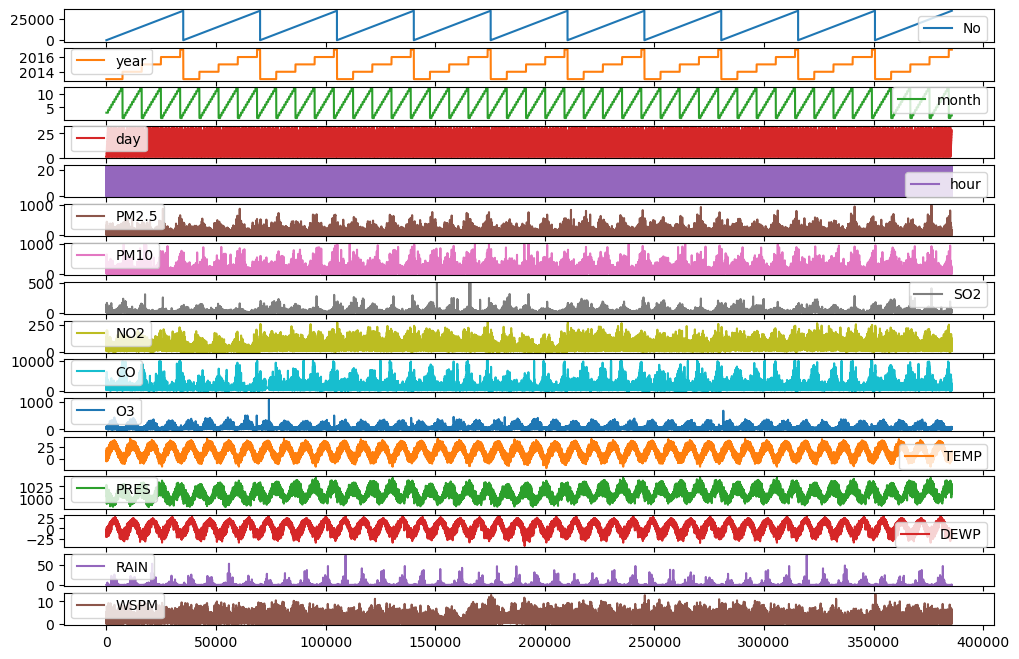

In [8]:
# Plot to confirm missing values are filled
df.plot(subplots=True, figsize=(12, 8))
plt.show()

In [9]:
train, test = df.iloc[285704:365704], df.iloc[365704:]


# Define target variable and exogenous variables
target = 'PM2.5'
exog_variables = ['No','PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

train_target = train[target]
test_target = test[target]

train_exog = train[exog_variables]
test_exog = test[exog_variables]

In [11]:
%pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/625.1 kB 330.3 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/625.1 kB 544.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/625.1 kB 585.1 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/625.1 kB 807.1 kB/s eta 0:00:01
   ----------- -------------------------- 194.6/625.1 kB 908.0 kB/s eta 0:00:01
   -------------------- ------------------- 327.7/625.1 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/625.1 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/625.1 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/625.1 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/625.1 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 k

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pmdarima as pm
import pandas as pd
import numpy as np


model = pm.auto_arima(
    train_target,                
    exogenous=train_exog,  
    start_p=0, start_q=0,  
    max_p=2, max_q=2,      
    max_d=1,               
    seasonal=True,
    m=24,                  
    start_P=0, start_Q=0,
    max_P=1, max_Q=1,      
    max_D=1,
    information_criterion='aic',  
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,         
)
# from google.colab import drive
# drive.mount('/content/drive')
import pickle

with open('/content/drive/My Drive/sarimax_model_bejing.pkl', 'wb') as file:
    pickle.dump(model, file)



In [11]:
import pickle
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# from google.colab import drive
# drive.mount('/content/drive')

with open('./sarimax_model_bejing.pkl', 'rb') as file:
    model = pickle.load(file)

n_periods = len(test_target)
predictions = model.predict(n_periods=n_periods, x=test_exog)
print(len(predictions))
print(len(test_target))
# Calculate accuracy metrics
mae = mean_absolute_error(test_target, predictions)
rmse = np.sqrt(mean_squared_error(test_target, predictions))
mape = mean_absolute_percentage_error(test_target, predictions)

# from sklearn.metrics import mean_squared_log_error
# msle_score = mean_squared_log_error(test_target, predictions)
# print("Mean Squared Logarithmic Error (MSLE):", msle_score)



print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

20000
20000
Mean Absolute Error (MAE): 75.82636762075215
Root Mean Squared Error (RMSE): 118.1254158104845
Mean Absolute Percentage Error (MAPE): 0.7633098793811367
